In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read and filter data

In [3]:
# read out_LED.csv as dataframe
og_df = pd.read_csv('../out_LED.csv')

# chose non repeat trials - 0 or 2 or missing
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ].copy()

# only session type 7
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]

# training level 16
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# psth

In [4]:
all_animals = df['animal'].unique()

all_led_on = df[ df['LED_trial'] == 1 ]
all_led_off = df [ df['LED_trial'] == 0 ]

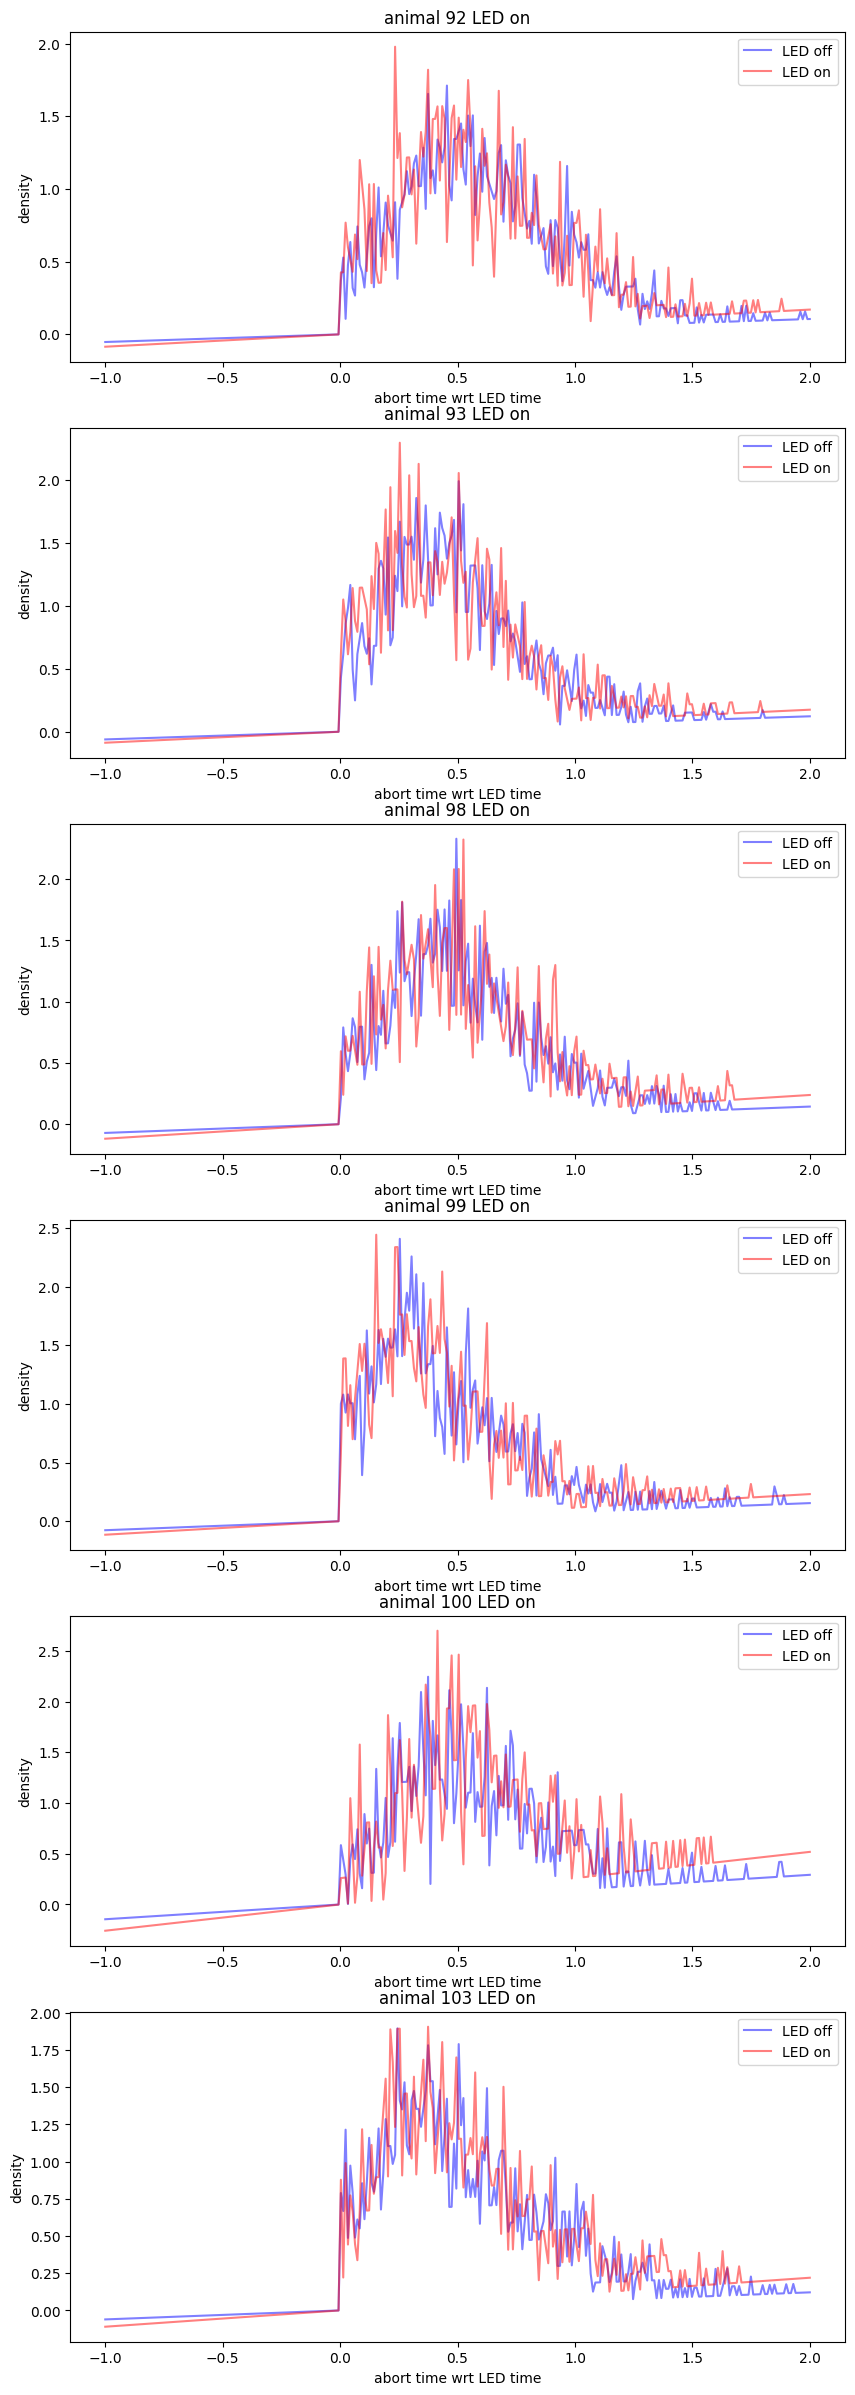

In [5]:
from matplotlib import lines


plt.figure(figsize=(10, 30))
bin_width = 1e-2
t_min = -1; t_max = 2; n_pts = int((t_max - t_min) / bin_width)
f = 1
t_pts = np.linspace(t_min, t_max, n_pts)
for animal in all_animals:
    # off trials    
    animal_led_off_trials = all_led_off[ all_led_off['animal'].isin([animal]) ]
    animal_led_off_counts = np.linspace(t_min, t_max, n_pts)
    N_aborts = 0
    for _, trial in animal_led_off_trials.iterrows():
        if trial['timed_fix'] < trial['intended_fix'] and trial['timed_fix'] > trial['LED_onset_time']:# if aborts
            led_onset_time = trial['LED_onset_time']
            abort_time = trial['timed_fix']

            abort_wrt_led_onset = abort_time - led_onset_time
            abort_wrt_led_onset_ms_idx = int((abort_wrt_led_onset - t_min) / bin_width)

            animal_led_off_counts[abort_wrt_led_onset_ms_idx] += 1
            N_aborts += 1


    animal_led_off_counts /= (N_aborts*bin_width)



    # on trials
    animal_led_on_trials = all_led_on[ all_led_on['animal'].isin([animal]) ]
    animal_led_on_counts = np.linspace(t_min, t_max, n_pts)
    N_aborts = 0
    for _, trial in animal_led_on_trials.iterrows():
        if trial['timed_fix'] < trial['intended_fix'] and trial['timed_fix'] > trial['LED_onset_time']:# if aborts
            led_onset_time = trial['LED_onset_time']
            abort_time = trial['timed_fix']

            abort_wrt_led_onset = abort_time - led_onset_time
            abort_wrt_led_onset_ms_idx = int((abort_wrt_led_onset - t_min) / bin_width)

            animal_led_on_counts[abort_wrt_led_onset_ms_idx] += 1
            N_aborts += 1
    
    
    animal_led_on_counts /= (N_aborts*bin_width)

    plt.subplot(len(all_animals),1, f)
    plt.plot(t_pts, animal_led_off_counts, label='LED off', color='blue', alpha = 0.5)
    plt.plot(t_pts, animal_led_on_counts, label='LED on', color='red', alpha = 0.5,)
    plt.xlabel('abort time wrt LED time'); plt.ylabel('density'); plt.title(f'animal {animal} LED on')
    plt.legend();
    f += 1

        


# Raster

In [ ]:
animal_led_on = all_led_on[ all_led_on['animal'] == all_animals[0] ]

t_pts = np.linspace(0, 3, 3000)
row_num = 1
plt.figure(figsize=(20, 50))
for idx, row in animal_led_on.iterrows():
    if not (row['response_poke'] in [2,3]) and not (row['abort_event'] == 3):
        continue
    led_t_idx = int(row['LED_onset_time']*1000)
    stim_t_idx = int(row['intended_fix']*1000)
    reaction_t_idx = int(row['timed_fix']*1000)



    plt.scatter(t_pts[led_t_idx], row_num, marker='|', s=50, facecolor='red')
    plt.scatter(t_pts[stim_t_idx], row_num, marker='|', s=50, facecolor='black')
    plt.scatter(t_pts[reaction_t_idx], row_num, marker='|', s=50, facecolor='blue')
    plt.scatter(0,row_num, color='yellow', s=50) 

    plt.xlim(0,2)
    plt.legend(['LED', 't_stim', 'reaction time', 'fixation'])

    row_num += 1
    if row_num == 50:
        break
